In [84]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [85]:
url = "web_scraper/no_games.csv"
df = pd.read_csv(url)

In [86]:
df.shape

(17448, 2)

In [87]:
len(df.movie_or_TV_name.unique())

5088

In [88]:
len(df.actor.unique())

187

In [89]:
len(df.movie_or_TV_name.unique()) + len(df.actor.unique())

5275

In [90]:
G = nx.from_pandas_edgelist(df, 
                             source = "movie_or_TV_name", 
                             target = "actor", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())

In [91]:
G.number_of_nodes()

5275

In [92]:
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 30]

In [93]:
to_be_removed[0:5]

["The World's Finest Assassin Gets Reincarnated in Another World as an Aristocrat",
 'Jujutsu Kaisen',
 'Dororo',
 'Ace Attorney',
 'Devilman: Crybaby']

In [94]:
for x in to_be_removed:
    G.remove_node(x)

In [95]:
colors = []
for node in G:
    if node in df["actor"].values:
        colors.append("lightblue") # Actor
    else: colors.append("red") # Project Title

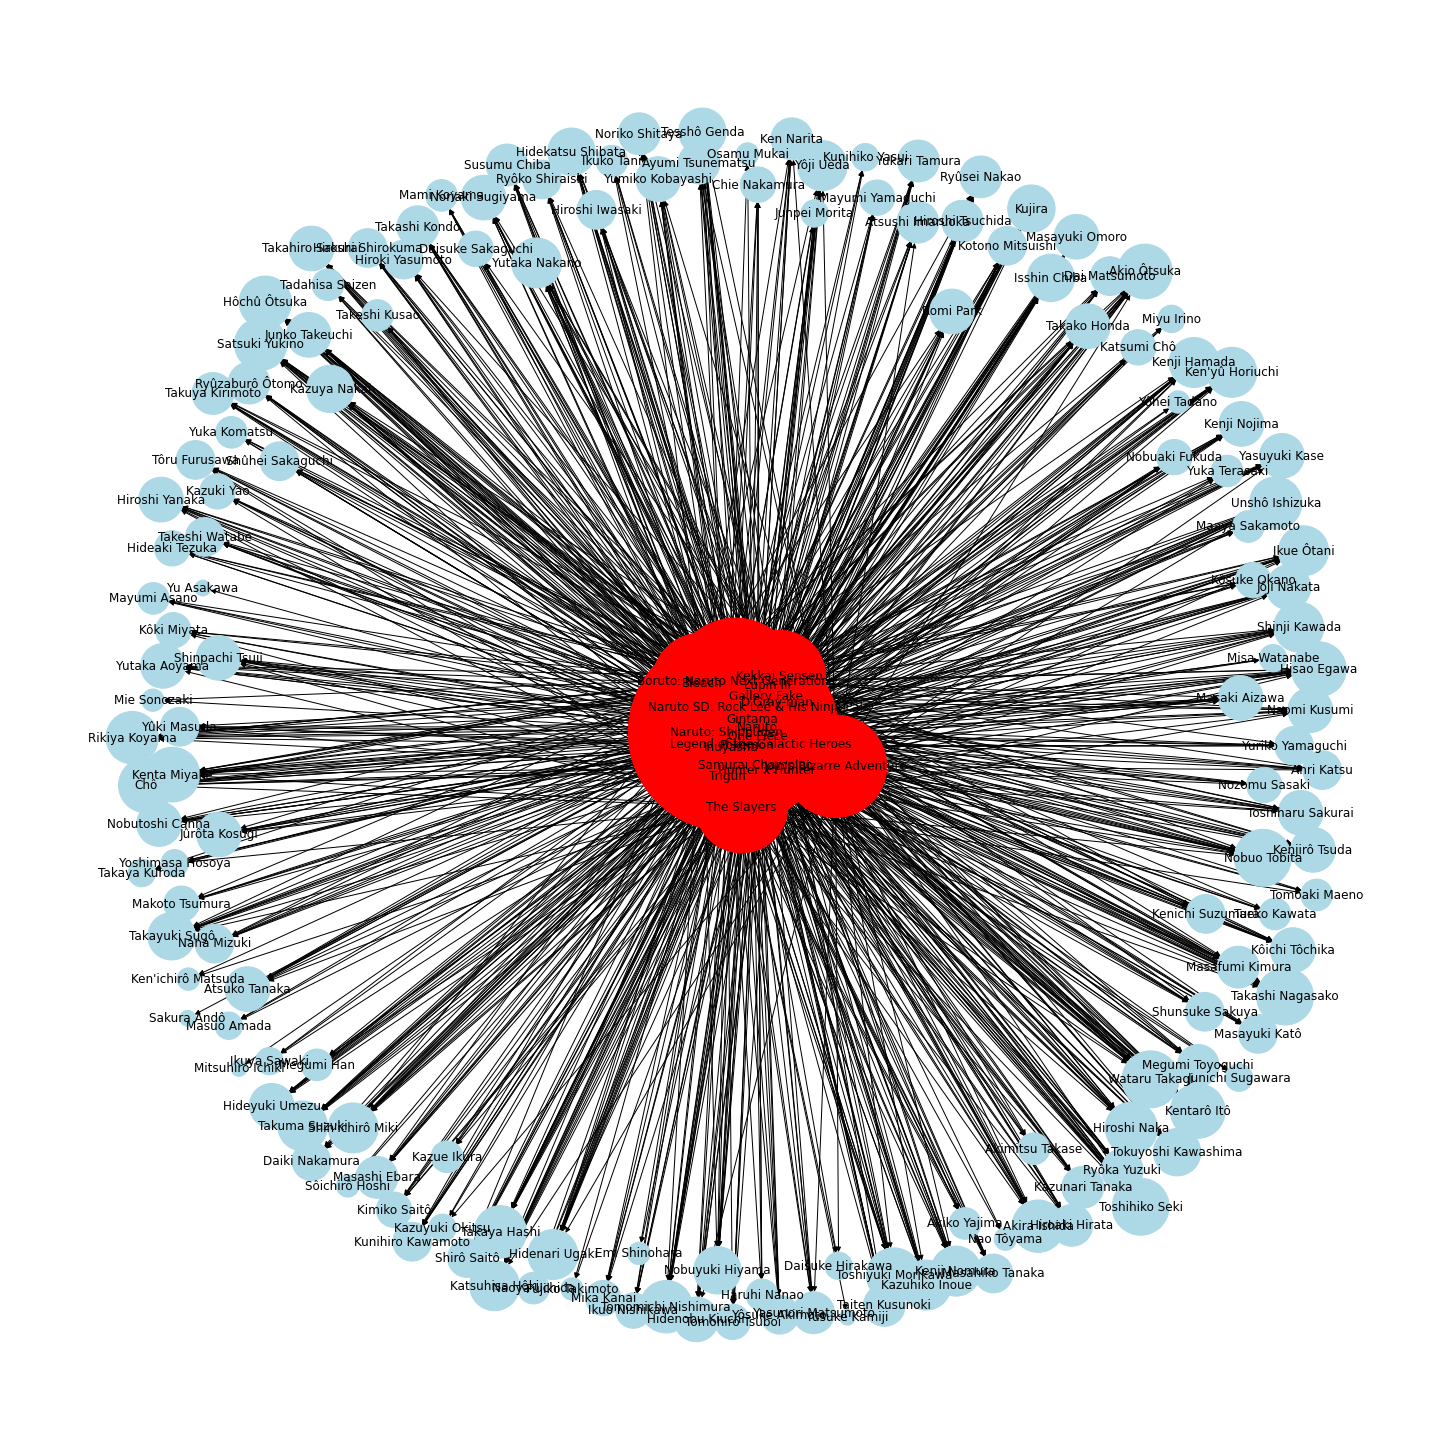

In [96]:
deg = G.degree()
plt.figure(figsize=(20, 20))
layout = nx.layout.fruchterman_reingold_layout(G, k=5/math.sqrt(G.order()))
nx.draw(G, layout,
        with_labels=True, 
        node_color = colors,
        node_size  = [250*deg[i] for i in G.nodes()])

In [97]:
temp = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
temp

[('Naruto: Shippûden', 155),
 ('Naruto', 103),
 ('Pokémon', 85),
 ('Gintama', 82),
 ('One Piece', 73),
 ('Boruto: Naruto Next Generations', 64),
 ('Naruto SD: Rock Lee & His Ninja Pals', 44),
 ('Legend of the Galactic Heroes', 43),
 ("JoJo's Bizarre Adventure", 42),
 ('Bleach', 41)]

In [98]:
top10 = pd.DataFrame(temp, columns=['show','degree strength'])
top10

,show,degree strength
0,Naruto: Shippûden,155
1,Naruto,103
2,Pokémon,85
3,Gintama,82
4,One Piece,73
5,Boruto: Naruto Next Generations,64
6,Naruto SD: Rock Lee & His Ninja Pals,44
7,Legend of the Galactic Heroes,43
8,JoJo's Bizarre Adventure,42
9,Bleach,41


In [99]:
temp = sorted(G.degree, key=lambda x: x[1], reverse=True)
temp

[('Naruto: Shippûden', 155),
 ('Naruto', 103),
 ('Pokémon', 85),
 ('Gintama', 82),
 ('One Piece', 73),
 ('Boruto: Naruto Next Generations', 64),
 ('Naruto SD: Rock Lee & His Ninja Pals', 44),
 ('Legend of the Galactic Heroes', 43),
 ("JoJo's Bizarre Adventure", 42),
 ('Bleach', 41),
 ('Inuyasha', 40),
 ('Samurai Champloo', 37),
 ('Trigun', 35),
 ('D.Gray-man', 35),
 ('Kekkai Sensen', 34),
 ('The Slayers', 34),
 ('Gallery Fake', 33),
 ('Hunter x Hunter', 31),
 ('Lupin III', 28),
 ('Takashi Nagasako', 13),
 ('Toshihiko Seki', 13),
 ('Wataru Takagi', 13),
 ('Nobuo Tobita', 13),
 ('Chô', 12),
 ('Akio Ôtsuka', 12),
 ('Kenta Miyake', 12),
 ('Hisao Egawa', 12),
 ('Toshiyuki Morikawa', 12),
 ('Kentarô Itô', 12),
 ('Rikiya Koyama', 11),
 ('Satsuki Yukino', 11),
 ('Hiroshi Naka', 11),
 ('Unshô Ishizuka', 11),
 ('Takaya Hashi', 11),
 ('Tomomichi Nishimura', 11),
 ('Hôchû Ôtsuka', 11),
 ('Akira Ishida', 11),
 ('Kazuhiko Inoue', 10),
 ('Hidenari Ugaki', 10),
 ('Kenji Nomura', 10),
 ('Katsuhisa Hôki

In [100]:
topX = list()
for i in range(0, len(temp)):
    if temp[i][0]  in df["movie_or_TV_name"].tolist():
        topX.append(temp[i])

topX   

[('Naruto: Shippûden', 155),
 ('Naruto', 103),
 ('Pokémon', 85),
 ('Gintama', 82),
 ('One Piece', 73),
 ('Boruto: Naruto Next Generations', 64),
 ('Naruto SD: Rock Lee & His Ninja Pals', 44),
 ('Legend of the Galactic Heroes', 43),
 ("JoJo's Bizarre Adventure", 42),
 ('Bleach', 41),
 ('Inuyasha', 40),
 ('Samurai Champloo', 37),
 ('Trigun', 35),
 ('D.Gray-man', 35),
 ('Kekkai Sensen', 34),
 ('The Slayers', 34),
 ('Gallery Fake', 33),
 ('Hunter x Hunter', 31),
 ('Lupin III', 28)]

In [101]:
top10 = pd.DataFrame(topX, columns=['show','degree strength'])
top10.head()

,show,degree strength
0,Naruto: Shippûden,155
1,Naruto,103
2,Pokémon,85
3,Gintama,82
4,One Piece,73


In [102]:
temp[29][0] in df["actor"]

False

In [103]:
import plotly.graph_objects as go
import networkx as nx
import plotly

In [104]:
A = list(df["actor"].unique())
B = list(df["movie_or_TV_name"].unique())
node_list = set(A+B)

In [105]:
G = nx.Graph()

In [106]:
for i in node_list:
    G.add_node(i)

In [107]:
for i,j in df.iterrows():
    G.add_edges_from([(j["actor"],j["movie_or_TV_name"])])

In [108]:
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 25]
for x in to_be_removed:
    G.remove_node(x)

In [109]:
pos = nx.spring_layout(G, k=1.0, iterations=50)

In [110]:
for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [111]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [112]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [113]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [114]:
plt.figure(figsize=(20, 20))
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Naruto network connections',
                titlefont=dict(size=20),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                     x=0.005, y=-0.002) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

<Figure size 1440x1440 with 0 Axes>

# Get Dataframe and Make Barchart

In [82]:
url = "web_scraper/no_games.csv"
df = pd.read_csv(url)
G = nx.from_pandas_edgelist(df, 
                             source = "movie_or_TV_name", 
                             target = "actor", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())
n = 25

In [66]:
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= n]
for x in to_be_removed:
    G.remove_node(x)
temp = sorted(G.degree, key=lambda x: x[1], reverse=True)

In [70]:
topX = list()
for i in range(0, len(temp)):
    if temp[i][0]  in df["movie_or_TV_name"].tolist():
        topX.append(temp[i])

recs = pd.DataFrame(topX, columns=['show','degree strength'])  
recs = recs.iloc[1:]
recs.head()

,show,degree strength
1,Naruto,104
2,Pokémon,86
3,Gintama,84
4,One Piece,73
5,Boruto: Naruto Next Generations,65


In [71]:
recs.head(n = 50)

,show,degree strength
1,Naruto,104
2,Pokémon,86
3,Gintama,84
4,One Piece,73
5,Boruto: Naruto Next Generations,65
6,Naruto SD: Rock Lee & His Ninja Pals,44
7,Legend of the Galactic Heroes,43
8,Bleach,42
9,JoJo's Bizarre Adventure,42
10,Inuyasha,41
